In [1]:
 '''
"I (We) certify that the code and data in this assignment were generated independently,
using only the tools and resources defined in the course and that I (we) did not receive
any external help, coaching or contributions during the production of this work."
'''

'\n"I (We) certify that the code and data in this assignment were generated independently,\nusing only the tools and resources defined in the course and that I (we) did not receive\nany external help, coaching or contributions during the production of this work."\n'

In [2]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import keras
import seaborn as sns
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization


In [3]:
# Information About Fashion MNIST Dataset

'''
Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. 
Each example is a 28x28 grayscale image, associated with a label from 10 classes.

'''

'''
Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

'''

labels = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Part 1 : Load, preprocess, analyze the dataset

In [4]:
data = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
# Dividing the dataset into Training and Testing
(trainX, trainy), (testX, testy) = data
train_label=trainy
print(trainy)
print(testy)
print(np.unique(trainy))
print(np.unique(trainX))

[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]
[0 1 2 3 4 5 6 7 8 9]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 2

TrainX: (60000, 28, 28)
TrainY: (60000,)
TestX: (10000, 28, 28)
TestY: (10000,)


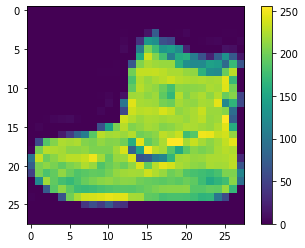

In [6]:
#Checking the Shape of Data
print(f'TrainX: {trainX.shape}')
print(f'TrainY: {trainy.shape}')
print(f'TestX: {testX.shape}')
print(f'TestY: {testy.shape}')

pyplot.imshow(trainX[0])
plt.colorbar()


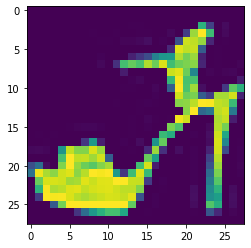

In [7]:
for i in range(10):
  plt.imshow(trainX[i])


3 visualization graphs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


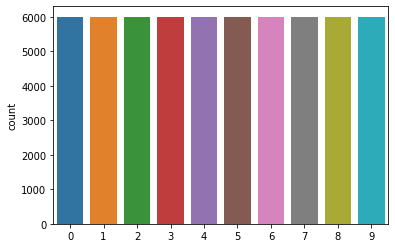

In [8]:
#Plot of Count of Train Data
plot = sns.countplot(train_label)



Text(0.5, 1.0, 'Label division in training data')

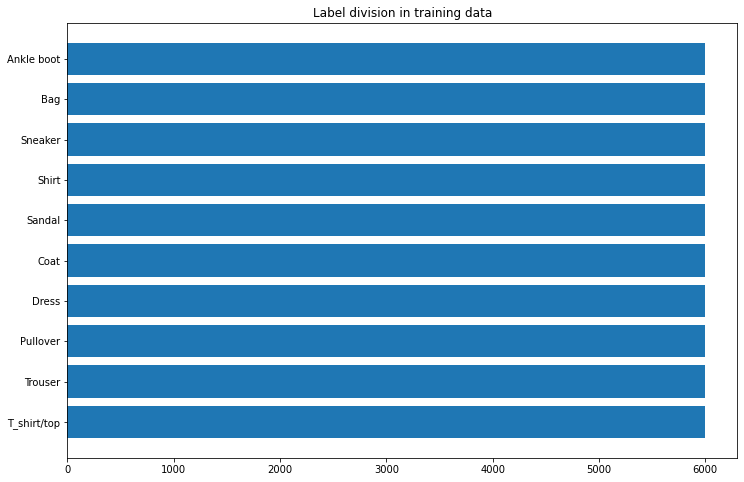

In [9]:
# Label division in training data
plt.figure(figsize=(12, 8))

label, label_count = np.unique(trainy, return_counts=True)
plt.barh(labels, label_count)
plt.title('Label division in training data')

Text(0.5, 1.0, 'Label division in test data')

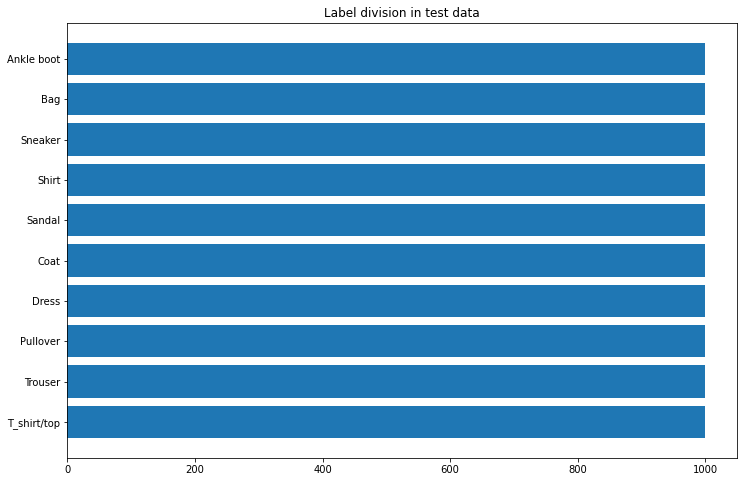

In [10]:
# Label division in test data
plt.figure(figsize=(12, 8))

label, label_count = np.unique(testy, return_counts=True)
plt.barh(labels, label_count)
plt.title('Label division in test data')

In [11]:
#Reshaping of Images
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [12]:
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(trainy.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(60000,)


In [13]:
#Checking Number of Labels
print(np.unique(trainy))
print(np.unique(testy))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [14]:
#Preprocessing of Data

trainX = trainX.astype('float32')
testX = testX.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
trainX = trainX / 255.0
testX = testX / 255.0 

print(np.unique(trainX))
# One hot encoding the labels
trainy = np_utils.to_categorical(trainy, 10)
testy = np_utils.to_categorical(testy, 10)

[0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.07450981 0.07843138 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196079 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941177 0.13333334 0.13725491
 0.14117648 0.14509805 0.14901961 0.15294118 0.15686275 0.16078432
 0.16470589 0.16862746 0.17254902 0.1764706  0.18039216 0.18431373
 0.1882353  0.19215687 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568628 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313726 0.24705882 0.2509804  0.25490198
 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314
 0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019608
 0.30588236 0.30980393 0.3137255  0.31764707 0.32156864 0.3254902
 0.32941177 0.33333334 0.3372549  0.34117648 0.34509805 0.3490196

Part 2: Build and train a basic CNN (with max 3 hidden layers).

In [15]:
#Building a CNN Model

model = Sequential()
#First CNN layer
model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
#Second CNN layer
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))   

# Checking the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0

In [16]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [17]:
history = model.fit(trainX, trainy, batch_size=120, epochs=10,
                    validation_data=(testX, testy))

Epoch 1/10
500/500 [==============================] - 20s 15ms/step - loss: 0.6198 - accuracy: 0.7921 - val_loss: 0.4571 - val_accuracy: 0.8460
Epoch 2/10
500/500 [==============================] - 7s 15ms/step - loss: 0.3631 - accuracy: 0.8749 - val_loss: 0.2947 - val_accuracy: 0.8943
Epoch 3/10
500/500 [==============================] - 7s 14ms/step - loss: 0.3060 - accuracy: 0.8932 - val_loss: 0.2676 - val_accuracy: 0.9020
Epoch 4/10
500/500 [==============================] - 7s 14ms/step - loss: 0.2754 - accuracy: 0.9046 - val_loss: 0.2629 - val_accuracy: 0.9044
Epoch 5/10
500/500 [==============================] - 7s 14ms/step - loss: 0.2512 - accuracy: 0.9104 - val_loss: 0.2556 - val_accuracy: 0.9097
Epoch 6/10
500/500 [==============================] - 7s 14ms/step - loss: 0.2292 - accuracy: 0.9201 - val_loss: 0.2508 - val_accuracy: 0.9145
Epoch 7/10
500/500 [==============================] - 7s 15ms/step - loss: 0.2169 - accuracy: 0.9245 - val_loss: 0.2339 - val_accuracy: 0.918

In [18]:
evaluate_train = model.evaluate(trainX, trainy, verbose=0)
evaluate_test = model.evaluate(testX, testy, verbose=0)
print('Test loss:', round(evaluate_test[0],4)*100)
print('Test accuracy:', round(evaluate_test[1],4)*100)
print('Train loss:', round(evaluate_train[0],4)*100)
print('Train accuracy:', round(evaluate_train[1],4)*100)

Test loss: 23.56
Test accuracy: 92.11
Train loss: 11.05
Train accuracy: 96.09


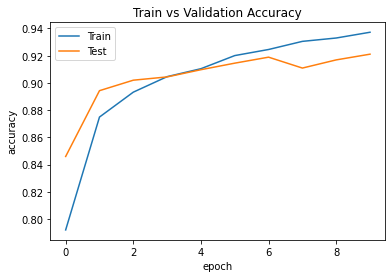

In [19]:
# Train vs Test Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Train vs Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

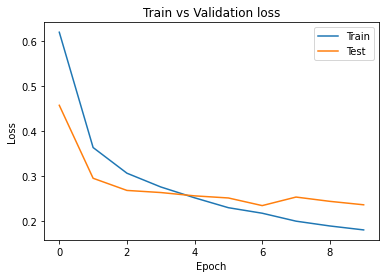

In [20]:
# Train vs Test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Train vs Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

Architecture structure of your CNN

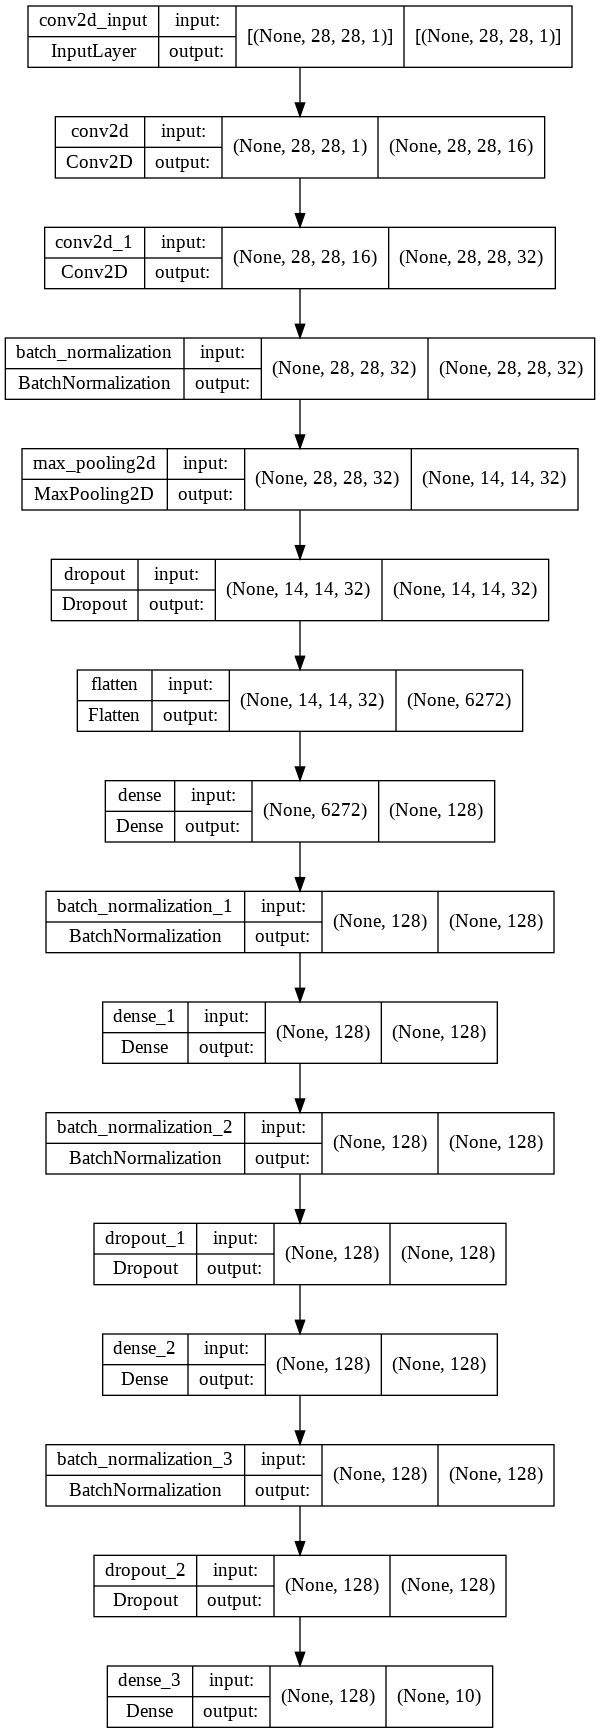

In [21]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Steps 3 - Add all the improvement methods that you tried for “Part II Step 3” of this assignment, that are applicable to CNN architecture (e.g. earlystopping).


Merhod -1 Earlyfolding

Epoch 1/50
500/500 [==============================] - 9s 16ms/step - loss: 0.6186 - accuracy: 0.7925 - val_loss: 0.4256 - val_accuracy: 0.8509
Epoch 2/50
500/500 [==============================] - 7s 14ms/step - loss: 0.3549 - accuracy: 0.8794 - val_loss: 0.2866 - val_accuracy: 0.8961
Epoch 3/50
500/500 [==============================] - 7s 14ms/step - loss: 0.3045 - accuracy: 0.8940 - val_loss: 0.2530 - val_accuracy: 0.9083
Epoch 4/50
500/500 [==============================] - 7s 14ms/step - loss: 0.2708 - accuracy: 0.9045 - val_loss: 0.2470 - val_accuracy: 0.9082
Epoch 5/50
500/500 [==============================] - 7s 15ms/step - loss: 0.2452 - accuracy: 0.9148 - val_loss: 0.2497 - val_accuracy: 0.9091
Epoch 6/50
500/500 [==============================] - 7s 14ms/step - loss: 0.2291 - accuracy: 0.9193 - val_loss: 0.2260 - val_accuracy: 0.9209
Epoch 7/50
500/500 [==============================] - 7s 15ms/step - loss: 0.2153 - accuracy: 0.9229 - val_loss: 0.2264 - val_accuracy: 0.9191

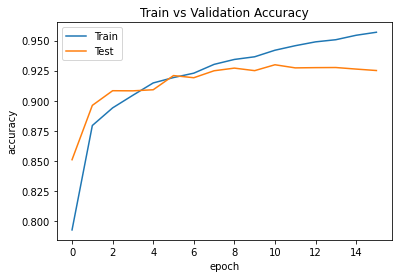

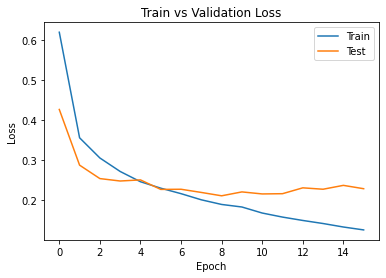

In [22]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    )


#Building a CNN Model

model = Sequential()
#First CNN layer
model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
#Second CNN layer
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))   

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

history = model.fit(trainX, trainy, batch_size=120, epochs=50,
                    validation_data=(testX, testy),callbacks=[callback], verbose=1)

evaluate_train = model.evaluate(trainX, trainy, verbose=0)
evaluate_test = model.evaluate(testX, testy, verbose=0)
print('Test loss:', round(evaluate_test[0],4)*100)
print('Test accuracy:', round(evaluate_test[1],4)*100)
print('Train loss:', round(evaluate_train[0],4)*100)
print('Train accuracy:', round(evaluate_train[1],4)*100)

# Train vs Test Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Train vs Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

# Train vs Test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

Method 2 - ReduceLROnPlateau

Reference - https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau

Epoch 1/50
500/500 [==============================] - 9s 15ms/step - loss: 0.6051 - accuracy: 0.7966 - val_loss: 0.4610 - val_accuracy: 0.8519 - lr: 0.0010
Epoch 2/50
500/500 [==============================] - 7s 14ms/step - loss: 0.3540 - accuracy: 0.8765 - val_loss: 0.3109 - val_accuracy: 0.8892 - lr: 0.0010
Epoch 3/50
500/500 [==============================] - 7s 15ms/step - loss: 0.3026 - accuracy: 0.8946 - val_loss: 0.2773 - val_accuracy: 0.8999 - lr: 0.0010
Epoch 4/50
500/500 [==============================] - 7s 14ms/step - loss: 0.2683 - accuracy: 0.9043 - val_loss: 0.4081 - val_accuracy: 0.8644 - lr: 0.0010
Epoch 5/50
500/500 [==============================] - 7s 15ms/step - loss: 0.2496 - accuracy: 0.9114 - val_loss: 0.2340 - val_accuracy: 0.9157 - lr: 0.0010
Epoch 6/50
500/500 [==============================] - 7s 15ms/step - loss: 0.2275 - accuracy: 0.9212 - val_loss: 0.2298 - val_accuracy: 0.9181 - lr: 0.0010
Epoch 7/50
500/500 [==============================] - 7s 14ms/st

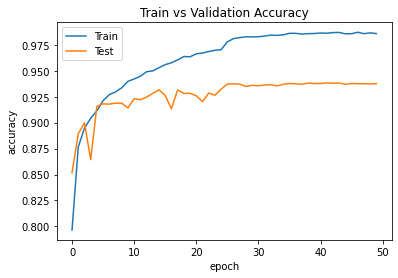

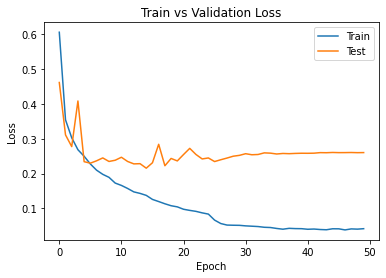

In [23]:
callback = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=10,
    verbose=1,
    mode='auto',
    min_delta=0.0001,
    cooldown=0,
    min_lr=0
)


#Building a CNN Model

model = Sequential()
#First CNN layer
model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
#Second CNN layer
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))   

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

history = model.fit(trainX, trainy, batch_size=120, epochs=50,
                    validation_data=(testX, testy),callbacks=[callback], verbose=1)

evaluate_train = model.evaluate(trainX, trainy, verbose=0)
evaluate_test = model.evaluate(testX, testy, verbose=0)
print('Test loss:', round(evaluate_test[0],4)*100)
print('Test accuracy:', round(evaluate_test[1],4)*100)
print('Train loss:', round(evaluate_train[0],4)*100)
print('Train accuracy:', round(evaluate_train[1],4)*100)

# Train vs Test Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Train vs Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

# Train vs Test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

Method 3 - K-Fold

------------------------------------------------------------------------
Performing Training for Fold Number  1 ...
Epoch 1/50
467/467 [==============================] - 9s 15ms/step - loss: 0.6501 - accuracy: 0.7788 - val_loss: 0.6527 - val_accuracy: 0.7718
Epoch 2/50
467/467 [==============================] - 7s 14ms/step - loss: 0.3673 - accuracy: 0.8736 - val_loss: 0.2660 - val_accuracy: 0.9038
Epoch 3/50
467/467 [==============================] - 7s 14ms/step - loss: 0.3137 - accuracy: 0.8911 - val_loss: 0.3248 - val_accuracy: 0.8880
Epoch 4/50
467/467 [==============================] - 7s 14ms/step - loss: 0.2774 - accuracy: 0.9031 - val_loss: 0.2292 - val_accuracy: 0.9186
Epoch 5/50
467/467 [==============================] - 7s 14ms/step - loss: 0.2510 - accuracy: 0.9121 - val_loss: 0.2380 - val_accuracy: 0.9173
Epoch 6/50
467/467 [==============================] - 7s 14ms/step - loss: 0.2330 - accuracy: 0.9189 - val_loss: 0.2210 - val_accuracy: 0.9221
Epoch 7/50
467/467 [======

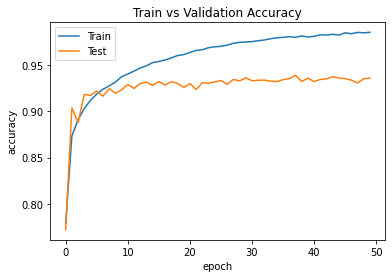

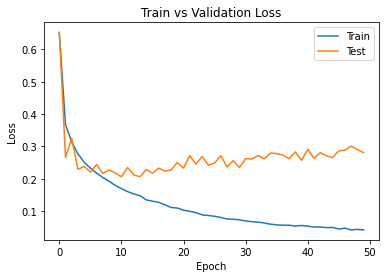

------------------------------------------------------------------------
------------------------------------------------------------------------
Performing Training for Fold Number  2 ...
Epoch 1/50
467/467 [==============================] - 8s 15ms/step - loss: 0.6275 - accuracy: 0.7906 - val_loss: 0.4657 - val_accuracy: 0.8367
Epoch 2/50
467/467 [==============================] - 7s 14ms/step - loss: 0.3659 - accuracy: 0.8751 - val_loss: 0.2866 - val_accuracy: 0.8946
Epoch 3/50
467/467 [==============================] - 7s 14ms/step - loss: 0.3100 - accuracy: 0.8929 - val_loss: 0.2561 - val_accuracy: 0.9057
Epoch 4/50
467/467 [==============================] - 7s 14ms/step - loss: 0.2765 - accuracy: 0.9035 - val_loss: 0.2420 - val_accuracy: 0.9106
Epoch 5/50
467/467 [==============================] - 7s 15ms/step - loss: 0.2516 - accuracy: 0.9121 - val_loss: 0.2492 - val_accuracy: 0.9111
Epoch 6/50
467/467 [==============================] - 7s 14ms/step - loss: 0.2321 - accuracy: 0.

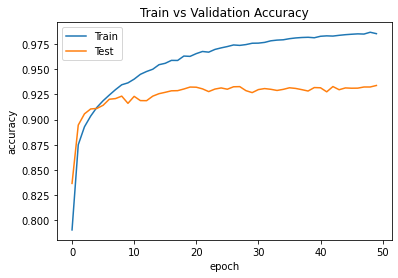

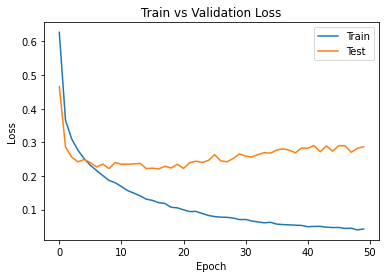

------------------------------------------------------------------------
------------------------------------------------------------------------
Performing Training for Fold Number  3 ...
Epoch 1/50
467/467 [==============================] - 8s 15ms/step - loss: 0.6484 - accuracy: 0.7778 - val_loss: 0.4540 - val_accuracy: 0.8496
Epoch 2/50
467/467 [==============================] - 7s 15ms/step - loss: 0.3784 - accuracy: 0.8693 - val_loss: 0.2960 - val_accuracy: 0.8946
Epoch 3/50
467/467 [==============================] - 7s 14ms/step - loss: 0.3217 - accuracy: 0.8866 - val_loss: 0.2695 - val_accuracy: 0.9013
Epoch 4/50
467/467 [==============================] - 7s 14ms/step - loss: 0.2857 - accuracy: 0.9000 - val_loss: 0.2545 - val_accuracy: 0.9071
Epoch 5/50
467/467 [==============================] - 7s 14ms/step - loss: 0.2599 - accuracy: 0.9078 - val_loss: 0.2740 - val_accuracy: 0.9056
Epoch 6/50
467/467 [==============================] - 7s 15ms/step - loss: 0.2407 - accuracy: 0.

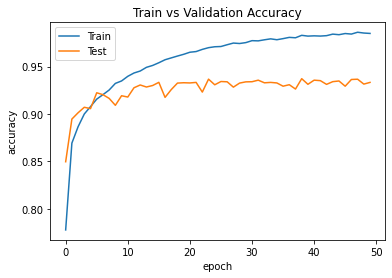

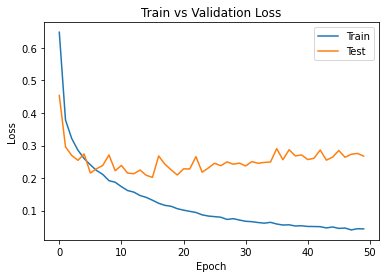

------------------------------------------------------------------------
------------------------------------------------------------------------
Performing Training for Fold Number  4 ...
Epoch 1/50
467/467 [==============================] - 9s 16ms/step - loss: 0.6488 - accuracy: 0.7831 - val_loss: 0.4507 - val_accuracy: 0.8414
Epoch 2/50
467/467 [==============================] - 7s 15ms/step - loss: 0.3794 - accuracy: 0.8689 - val_loss: 0.2684 - val_accuracy: 0.9036
Epoch 3/50
467/467 [==============================] - 7s 15ms/step - loss: 0.3186 - accuracy: 0.8886 - val_loss: 0.2561 - val_accuracy: 0.9084
Epoch 4/50
467/467 [==============================] - 7s 15ms/step - loss: 0.2855 - accuracy: 0.9002 - val_loss: 0.2834 - val_accuracy: 0.8964
Epoch 5/50
467/467 [==============================] - 7s 15ms/step - loss: 0.2577 - accuracy: 0.9101 - val_loss: 0.2234 - val_accuracy: 0.9214
Epoch 6/50
467/467 [==============================] - 7s 15ms/step - loss: 0.2373 - accuracy: 0.

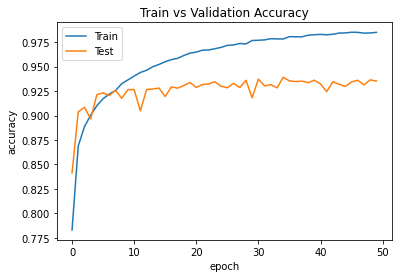

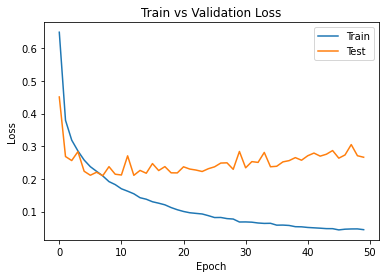

------------------------------------------------------------------------
------------------------------------------------------------------------
Performing Training for Fold Number  5 ...
Epoch 1/50
467/467 [==============================] - 9s 16ms/step - loss: 0.6291 - accuracy: 0.7861 - val_loss: 0.6542 - val_accuracy: 0.7483
Epoch 2/50
467/467 [==============================] - 7s 15ms/step - loss: 0.3661 - accuracy: 0.8739 - val_loss: 0.2583 - val_accuracy: 0.9074
Epoch 3/50
467/467 [==============================] - 7s 15ms/step - loss: 0.3064 - accuracy: 0.8936 - val_loss: 0.2710 - val_accuracy: 0.9032
Epoch 4/50
467/467 [==============================] - 7s 15ms/step - loss: 0.2752 - accuracy: 0.9046 - val_loss: 0.2385 - val_accuracy: 0.9151
Epoch 5/50
467/467 [==============================] - 7s 15ms/step - loss: 0.2538 - accuracy: 0.9108 - val_loss: 0.2232 - val_accuracy: 0.9214
Epoch 6/50
467/467 [==============================] - 7s 15ms/step - loss: 0.2354 - accuracy: 0.

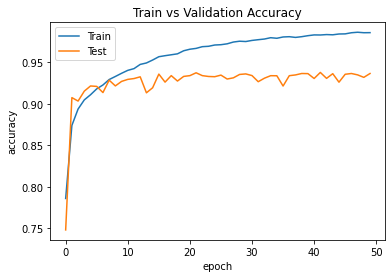

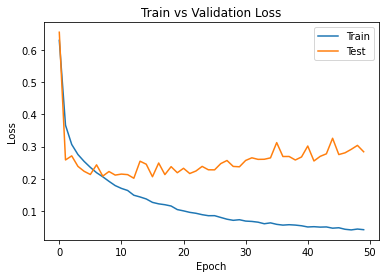

------------------------------------------------------------------------


In [24]:
from sklearn.model_selection import KFold

# Merge labels and targets
labels = np.concatenate((trainX, testX), axis=0)
outputs = np.concatenate((trainy, testy), axis=0)

# Define the K-fold Cross Validator
kf = KFold(n_splits=5, random_state=None, shuffle=True)

# K-fold Cross Validation model evaluation
iter = 1
for train_index, test_index in kf.split(labels, outputs):

    #Building a CNN Model

  model = Sequential()
  #First CNN layer
  model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
  #Second CNN layer
  model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))

  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Dropout(0.5))


  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  # model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))   

  model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

  print('------------------------------------------------------------------------')
  print(f'Performing Training for Fold Number  {iter} ...')

  history = model.fit(labels[train_index], outputs[train_index], batch_size=120, epochs=50,
                      validation_data=(labels[test_index], outputs[test_index]), verbose=1)

  evaluate_train = model.evaluate(labels[train_index], outputs[train_index], verbose=0)
  evaluate_test = model.evaluate(labels[test_index], outputs[test_index], verbose=0)
  print('Test loss:', round(evaluate_test[0],4)*100)
  print('Test accuracy:', round(evaluate_test[1],4)*100)
  print('Train loss:', round(evaluate_train[0],4)*100)
  print('Train accuracy:', round(evaluate_train[1],4)*100)

  # Train vs Test Accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])

  plt.title('Train vs Validation Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['Train', 'Test'])
  plt.show()

  # Train vs Test loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])

  plt.title('Train vs Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Test'])
  plt.show()



  iter = iter + 1
  print('------------------------------------------------------------------------')

Method - 4 LearningRateScheduler

Reference - https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
500/500 [==============================] - 9s 15ms/step - loss: 0.6286 - accuracy: 0.7863 - val_loss: 0.4370 - val_accuracy: 0.8394 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999980475013564.
Epoch 2/50
500/500 [==============================] - 7s 14ms/step - loss: 0.3722 - accuracy: 0.8714 - val_loss: 0.2970 - val_accuracy: 0.8951 - lr: 1.0000e-03

Epoch 3: LearningRateScheduler setting learning rate to 0.0009999940684607064.
Epoch 3/50
500/500 [==============================] - 7s 14ms/step - loss: 0.3140 - accuracy: 0.8909 - val_loss: 0.2926 - val_accuracy: 0.8943 - lr: 9.9999e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.000999988110387376.
Epoch 4/50
500/500 [==============================] - 7s 14ms/step - loss: 0.2798 - accuracy: 0.9031 - val_loss: 0.2756 - val_accuracy: 0.9031 - lr: 9.9999e-04

Epoch 5: LearningRateScheduler setting learn

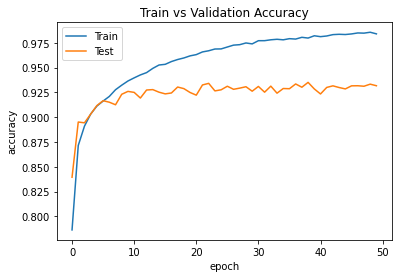

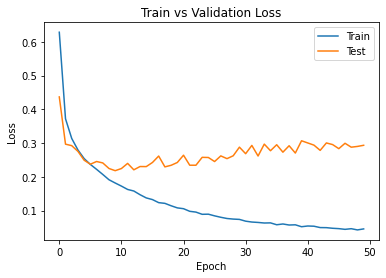

In [25]:
initial_learning_rate = 0.0001
epochs = 50
decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

#Building a CNN Model

model = Sequential()
#First CNN layer
model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
#Second CNN layer
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))   

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

history = model.fit(trainX, trainy, batch_size=120, epochs=50,
                    validation_data=(testX, testy),callbacks=[keras.callbacks.LearningRateScheduler(lr_time_based_decay, verbose=1)], verbose=1)

evaluate_train = model.evaluate(trainX, trainy, verbose=0)
evaluate_test = model.evaluate(testX, testy, verbose=0)
print('Test loss:', round(evaluate_test[0],4)*100)
print('Test accuracy:', round(evaluate_test[1],4)*100)
print('Train loss:', round(evaluate_train[0],4)*100)
print('Train accuracy:', round(evaluate_train[1],4)*100)

# Train vs Test Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Train vs Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

# Train vs Test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

In [26]:

# serialize weights to HDF5
model.save("cnn_model_w_o_w8.h5")
print("Saved model to disk")

Saved model to disk


Part IV: Optimizing CNN + Data Argumentation

Dropout Training

In [27]:
dropout_iter = [0.1,0.3,0.7]
train_acc = []
test_acc = []
train_loss = []
test_loss = []

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization_36 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_27 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 flatten_9 (Flatten)         (None, 6272)             

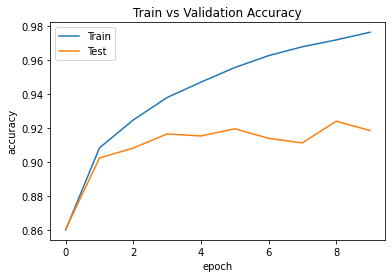

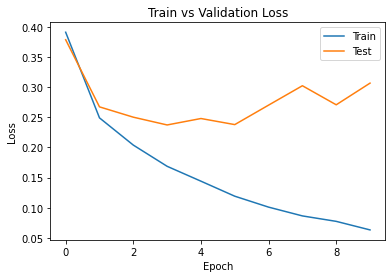

[0.9829833507537842]
[0.04830149561166763]
[0.9186999797821045]
[0.30648350715637207]
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization_40 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 14, 14, 32)        0         
                                 

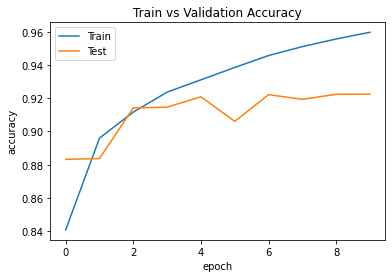

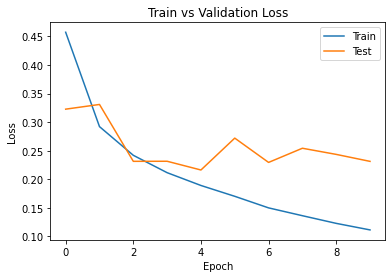

[0.9829833507537842, 0.9758166670799255]
[0.04830149561166763, 0.07049208134412766]
[0.9186999797821045, 0.9225000143051147]
[0.30648350715637207, 0.2313501536846161]
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization_44 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_33 (Dropo

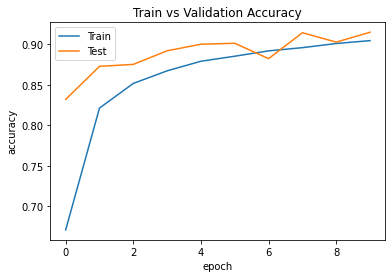

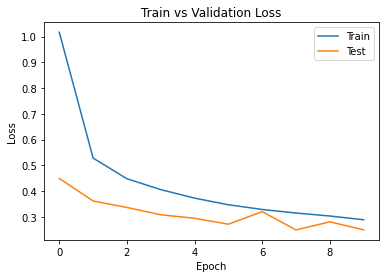

[0.9829833507537842, 0.9758166670799255, 0.9381333589553833]
[0.04830149561166763, 0.07049208134412766, 0.1737934947013855]
[0.9186999797821045, 0.9225000143051147, 0.9150000214576721]
[0.30648350715637207, 0.2313501536846161, 0.24897800385951996]


In [28]:
#Building a CNN Model
for i in range(len(dropout_iter)):

  model = Sequential()
  #First CNN layer
  model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
  #Second CNN layer
  model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))

  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Dropout(dropout_iter[i]))


  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(dropout_iter[i]))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(dropout_iter[i]))
  model.add(layers.Dense(10, activation='softmax'))   

  # Checking the model summary
  model.summary()

  model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

  history = model.fit(trainX, trainy, batch_size=100, epochs=10,
                    validation_data=(testX, testy))
  
  evaluate_train = model.evaluate(trainX, trainy, verbose=0)
  evaluate_test = model.evaluate(testX, testy, verbose=0)
  print('Test loss:', round(evaluate_test[0],4)*100)
  print('Test accuracy:', round(evaluate_test[1],4)*100)
  print('Train loss:', round(evaluate_train[0],4)*100)
  print('Train accuracy:', round(evaluate_train[1],4)*100)

  train_acc.append(evaluate_train[1])
  test_acc.append(evaluate_test[1])
  train_loss.append(evaluate_train[0])
  test_loss.append(evaluate_test[0])

    # Train vs Test Accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])

  plt.title('Train vs Validation Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['Train', 'Test'])
  plt.show()

  # Train vs Test loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])

  plt.title('Train vs Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Test'])
  plt.show()

  print(train_acc)
  print(train_loss)
  print(test_acc)
  print(test_loss)


Optimizer Tuning

In [29]:
optimizer_iter = ['RMSprop','Adadelta','Adagrad']
train_acc1 = []
test_acc1 = []
train_loss1 = []
test_loss1 = []

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization_48 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 flatten_12 (Flatten)        (None, 6272)            

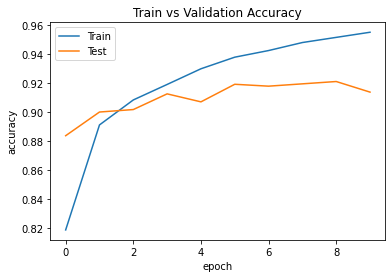

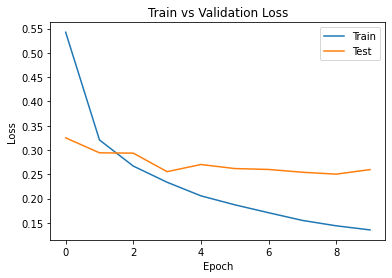

[0.9618666768074036]
[0.10852464288473129]
[0.9136000275611877]
[0.2597871422767639]
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization_52 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_39 (Dropout)        (None, 14, 14, 32)        0         
                                  

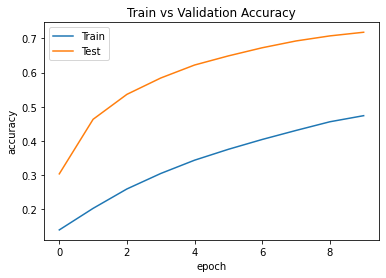

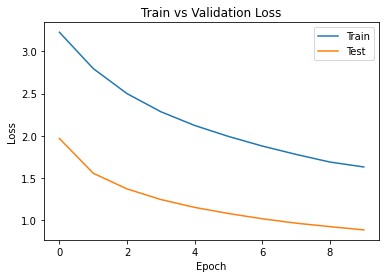

[0.9618666768074036, 0.7199833393096924]
[0.10852464288473129, 0.8702122569084167]
[0.9136000275611877, 0.7178999781608582]
[0.2597871422767639, 0.8843767642974854]
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_29 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization_56 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_42 (Dropout

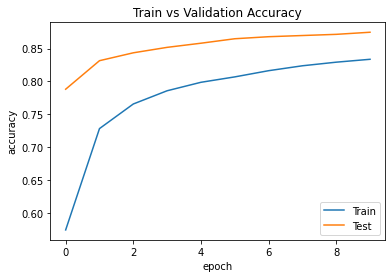

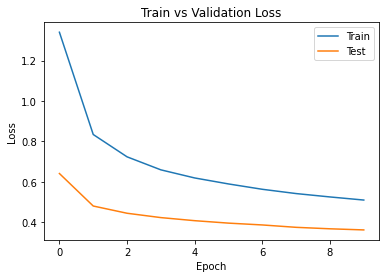

[0.9618666768074036, 0.7199833393096924, 0.8853999972343445]
[0.10852464288473129, 0.8702122569084167, 0.3260815441608429]
[0.9136000275611877, 0.7178999781608582, 0.8748000264167786]
[0.2597871422767639, 0.8843767642974854, 0.3615144193172455]


In [30]:
#Building a CNN Model
for i in range(len(optimizer_iter)):

  model = Sequential()
  #First CNN layer
  model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
  #Second CNN layer
  model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))

  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Dropout(0.3))


  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))   

  # Checking the model summary
  model.summary()

  model.compile(optimizer= optimizer_iter[i], loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

  history = model.fit(trainX, trainy, batch_size=100, epochs=10,
                    validation_data=(testX, testy))
  
  evaluate_train = model.evaluate(trainX, trainy, verbose=0)
  evaluate_test = model.evaluate(testX, testy, verbose=0)
  print('Test loss:', round(evaluate_test[0],4)*100)
  print('Test accuracy:', round(evaluate_test[1],4)*100)
  print('Train loss:', round(evaluate_train[0],4)*100)
  print('Train accuracy:', round(evaluate_train[1],4)*100)

  train_acc1.append(evaluate_train[1])
  test_acc1.append(evaluate_test[1])
  train_loss1.append(evaluate_train[0])
  test_loss1.append(evaluate_test[0])

    # Train vs Test Accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])

  plt.title('Train vs Validation Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['Train', 'Test'])
  plt.show()

  # Train vs Test loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])

  plt.title('Train vs Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Test'])
  plt.show()

  print(train_acc1)
  print(train_loss1)
  print(test_acc1)
  print(test_loss1)

Activation Function Tunining

In [31]:
activation_iter = ['softplus','softsign','tanh']
train_acc2 = []
test_acc2 = []
train_loss2 = []
test_loss2 = []

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization_60 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_45 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 flatten_15 (Flatten)        (None, 6272)            

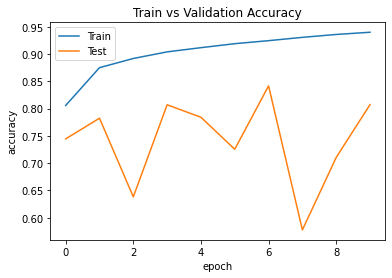

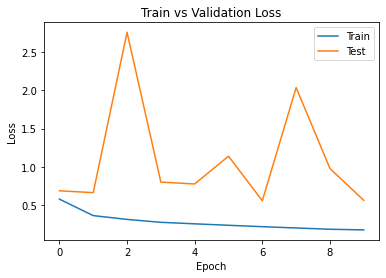

[0.8321666717529297]
[0.44338297843933105]
[0.8072999715805054]
[0.5588829517364502]
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization_64 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_48 (Dropout)        (None, 14, 14, 32)        0         
                                  

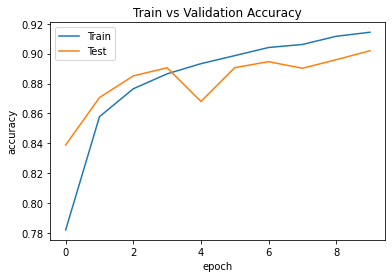

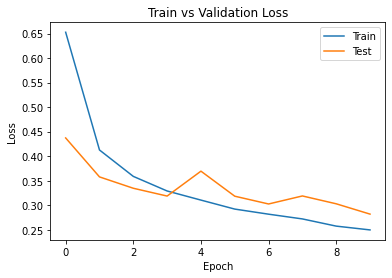

[0.8321666717529297, 0.930733323097229]
[0.44338297843933105, 0.19789591431617737]
[0.8072999715805054, 0.9018999934196472]
[0.5588829517364502, 0.28188711404800415]
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_35 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization_68 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_51 (Dropou

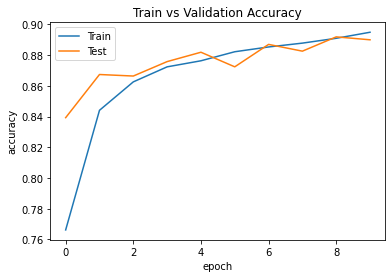

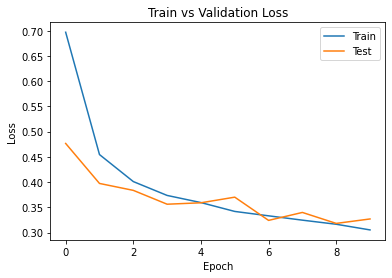

[0.8321666717529297, 0.930733323097229, 0.9098333120346069]
[0.44338297843933105, 0.19789591431617737, 0.2521441876888275]
[0.8072999715805054, 0.9018999934196472, 0.8899999856948853]
[0.5588829517364502, 0.28188711404800415, 0.32703331112861633]


In [32]:
#Building a CNN Model
for i in range(len(activation_iter)):

  model = Sequential()
  #First CNN layer
  model.add(layers.Conv2D(16, (3,3), padding='same', activation= activation_iter[i], input_shape=(28,28,1)))
  #Second CNN layer
  model.add(layers.Conv2D(32, (3,3), padding='same', activation= activation_iter[i]))

  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Dropout(0.3))


  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation= activation_iter[i]))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(128, activation= activation_iter[i]))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation= activation_iter[i]))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))   

  # Checking the model summary
  model.summary()

  model.compile(optimizer= 'adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

  history = model.fit(trainX, trainy, batch_size=100, epochs=10,
                    validation_data=(testX, testy))
  
  evaluate_train = model.evaluate(trainX, trainy, verbose=0)
  evaluate_test = model.evaluate(testX, testy, verbose=0)
  print('Test loss:', round(evaluate_test[0],4)*100)
  print('Test accuracy:', round(evaluate_test[1],4)*100)
  print('Train loss:', round(evaluate_train[0],4)*100)
  print('Train accuracy:', round(evaluate_train[1],4)*100)

  train_acc2.append(evaluate_train[1])
  test_acc2.append(evaluate_test[1])
  train_loss2.append(evaluate_train[0])
  test_loss2.append(evaluate_test[0])

    # Train vs Test Accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])

  plt.title('Train vs Validation Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['Train', 'Test'])
  plt.show()

  # Train vs Test loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])

  plt.title('Train vs Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Test'])
  plt.show()

  print(train_acc2)
  print(train_loss2)
  print(test_acc2)
  print(test_loss2)

Initializer Tuning

In [33]:
init_iter = ['glorot_uniform','he_normal','he_uniform']
train_acc3 = []
test_acc3 = []
train_loss3 = []
test_loss3 = []

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_37 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization_72 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_54 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 flatten_18 (Flatten)        (None, 6272)            

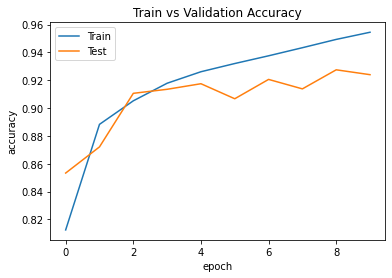

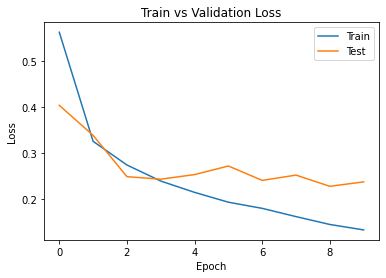

[0.9753000140190125]
[0.07218878716230392]
[0.9240000247955322]
[0.23756904900074005]
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_39 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization_76 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_57 (Dropout)        (None, 14, 14, 32)        0         
                                 

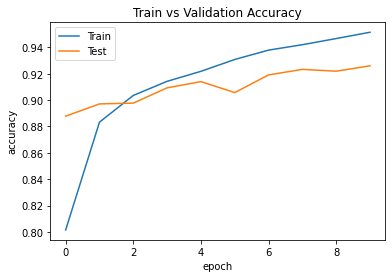

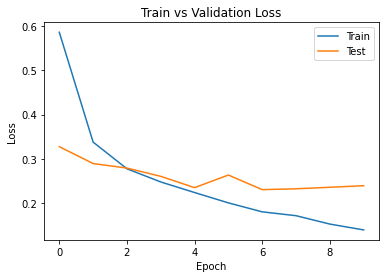

[0.9753000140190125, 0.9742500185966492]
[0.07218878716230392, 0.0734625831246376]
[0.9240000247955322, 0.9259999990463257]
[0.23756904900074005, 0.2387482225894928]
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_41 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization_80 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_60 (Dropou

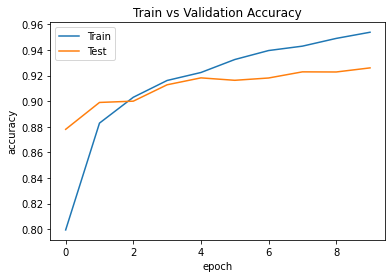

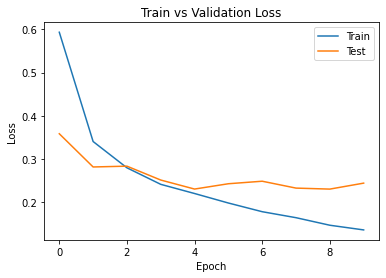

[0.9753000140190125, 0.9742500185966492, 0.9739999771118164]
[0.07218878716230392, 0.0734625831246376, 0.07442988455295563]
[0.9240000247955322, 0.9259999990463257, 0.9259999990463257]
[0.23756904900074005, 0.2387482225894928, 0.244208425283432]


In [34]:
#Building a CNN Model
for i in range(len(init_iter)):

  model = Sequential()
  #First CNN layer
  model.add(layers.Conv2D(16, (3,3), padding='same', activation= 'relu', input_shape=(28,28,1)))
  #Second CNN layer
  model.add(layers.Conv2D(32, (3,3), padding='same', activation= 'relu'))

  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Dropout(0.3))


  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation= 'relu',kernel_initializer=init_iter[i]))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(128, activation= 'relu',kernel_initializer=init_iter[i]))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation= 'relu',kernel_initializer=init_iter[i]))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax',kernel_initializer=init_iter[i]))   

  # Checking the model summary
  model.summary()

  model.compile(optimizer= 'adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

  history = model.fit(trainX, trainy, batch_size=100, epochs=10,
                    validation_data=(testX, testy))
  
  evaluate_train = model.evaluate(trainX, trainy, verbose=0)
  evaluate_test = model.evaluate(testX, testy, verbose=0)
  print('Test loss:', round(evaluate_test[0],4)*100)
  print('Test accuracy:', round(evaluate_test[1],4)*100)
  print('Train loss:', round(evaluate_train[0],4)*100)
  print('Train accuracy:', round(evaluate_train[1],4)*100)

  train_acc3.append(evaluate_train[1])
  test_acc3.append(evaluate_test[1])
  train_loss3.append(evaluate_train[0])
  test_loss3.append(evaluate_test[0])

    # Train vs Test Accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])

  plt.title('Train vs Validation Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['Train', 'Test'])
  plt.show()

  # Train vs Test loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])

  plt.title('Train vs Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Test'])
  plt.show()

  print(train_acc3)
  print(train_loss3)
  print(test_acc3)
  print(test_loss3)

Kernal Size Tuning

In [35]:
kernal_iter = [5,7,9]
train_acc4 = []
test_acc4 = []
train_loss4 = []
test_loss4 = []

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 conv2d_43 (Conv2D)          (None, 28, 28, 32)        12832     
                                                                 
 batch_normalization_84 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_63 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 flatten_21 (Flatten)        (None, 6272)            

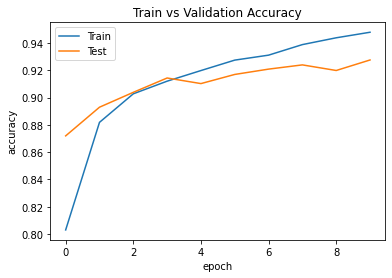

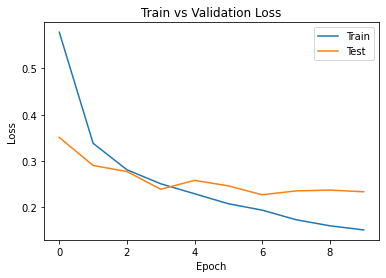

[0.9713833332061768]
[0.08327079564332962]
[0.9275000095367432]
[0.23344363272190094]
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 28, 28, 16)        800       
                                                                 
 conv2d_45 (Conv2D)          (None, 28, 28, 32)        25120     
                                                                 
 batch_normalization_88 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_66 (Dropout)        (None, 14, 14, 32)        0         
                                 

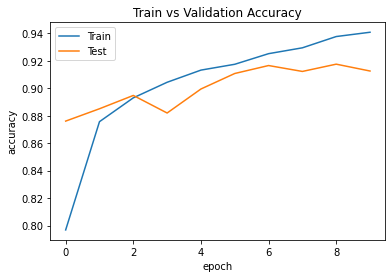

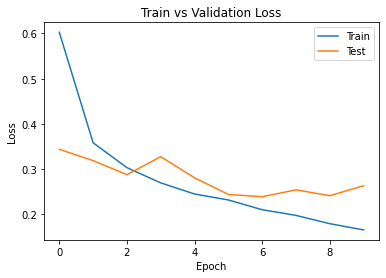

[0.9713833332061768, 0.9539999961853027]
[0.08327079564332962, 0.12588150799274445]
[0.9275000095367432, 0.9125999808311462]
[0.23344363272190094, 0.2630695700645447]
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 28, 28, 16)        1312      
                                                                 
 conv2d_47 (Conv2D)          (None, 28, 28, 32)        41504     
                                                                 
 batch_normalization_92 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_69 (Dropo

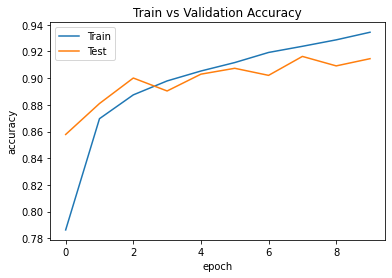

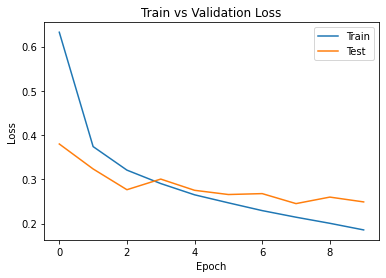

[0.9713833332061768, 0.9539999961853027, 0.9547666907310486]
[0.08327079564332962, 0.12588150799274445, 0.1228376105427742]
[0.9275000095367432, 0.9125999808311462, 0.9146000146865845]
[0.23344363272190094, 0.2630695700645447, 0.24882690608501434]


In [36]:
#Building a CNN Model
for i in range(len(kernal_iter)):

  model = Sequential()
  #First CNN layer
  model.add(layers.Conv2D(16, (kernal_iter[i]), padding='same', activation= 'relu', input_shape=(28,28,1)))
  #Second CNN layer
  model.add(layers.Conv2D(32, (kernal_iter[i]), padding='same', activation= 'relu'))

  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Dropout(0.3))


  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation= 'relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(128, activation= 'relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation= 'relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))   

  # Checking the model summary
  model.summary()

  model.compile(optimizer= 'adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

  history = model.fit(trainX, trainy, batch_size=100, epochs=10,
                    validation_data=(testX, testy))
  
  evaluate_train = model.evaluate(trainX, trainy, verbose=0)
  evaluate_test = model.evaluate(testX, testy, verbose=0)
  print('Test loss:', round(evaluate_test[0],4)*100)
  print('Test accuracy:', round(evaluate_test[1],4)*100)
  print('Train loss:', round(evaluate_train[0],4)*100)
  print('Train accuracy:', round(evaluate_train[1],4)*100)

  train_acc4.append(evaluate_train[1])
  test_acc4.append(evaluate_test[1])
  train_loss4.append(evaluate_train[0])
  test_loss4.append(evaluate_test[0])

    # Train vs Test Accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])

  plt.title('Train vs Validation Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['Train', 'Test'])
  plt.show()

  # Train vs Test loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])

  plt.title('Train vs Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Test'])
  plt.show()

  print(train_acc4)
  print(train_loss4)
  print(test_acc4)
  print(test_loss4)

Increase the dataset by x4 using any data augmentation techniques (rotations, shifting, mirroring, etc).

In [37]:
print(trainX.shape,trainy.shape)

(60000, 28, 28, 1) (60000, 10)


In [38]:
print(testX.shape,testy.shape)

(10000, 28, 28, 1) (10000, 10)


In [39]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False,drop='first')
encodedtrainy = encoder.fit_transform(trainy)

encoder = OneHotEncoder(sparse=False,drop='first')
encodedtesty = encoder.fit_transform(testy)



In [40]:
print(encodedtrainy.shape,encodedtesty.shape)

(60000, 10) (10000, 10)


In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#data = ImageDataGenerator(horizontal_flip=True)

def generatedata(x,y,size):

  data = ImageDataGenerator(horizontal_flip=True)

  dataa= data.flow(x,y,batch_size=size)
  x1 = np.copy(x)
  y1 = np.copy(y)
  j=3
  for i in range (j):
    images = dataa.next()
    x1 = np.concatenate((x1,images[0]))
    y1 = np.concatenate((y1,images[1]))

  return x1,y1

trainX1,trainy1 = generatedata(trainX,encodedtrainy,60000)
testX1,testy1 = generatedata(testX,encodedtesty,60000)

print(trainX1.shape,trainy1.shape)
print(testX1.shape,testy1.shape)

(240000, 28, 28, 1) (240000, 10)
(40000, 28, 28, 1) (40000, 10)



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/20
2000/2000 [==============================] - 30s 14ms/step - loss: 0.4152 - accuracy: 0.8579 - val_loss: 0.2776 - val_accuracy: 0.8992 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999950475222136.
Epoch 2/20
2000/2000 [==============================] - 29s 14ms/step - loss: 0.2497 - accuracy: 0.9127 - val_loss: 0.2335 - val_accuracy: 0.9167 - lr: 1.0000e-03

Epoch 3: LearningRateScheduler setting learning rate to 0.0009999850417881948.
Epoch 3/20
2000/2000 [==============================] - 29s 14ms/step - loss: 0.2023 - accuracy: 0.9291 - val_loss: 0.2254 - val_accuracy: 0.9220 - lr: 9.9999e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00099997003037048.
Epoch 4/20
2000/2000 [==============================] - 29s 14ms/step - loss: 0.1722 - accuracy: 0.9399 - val_loss: 0.2124 - val_accuracy: 0.9258 - lr: 9.9997e-04

Epoch 5: LearningRateScheduler se

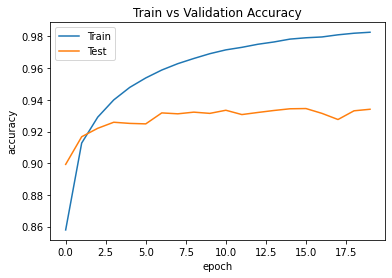

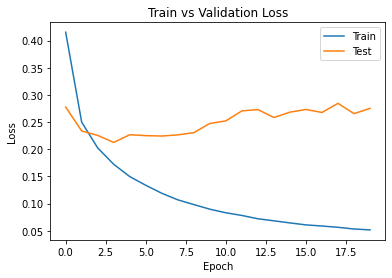

In [42]:
initial_learning_rate = 0.0001
epochs = 20
decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

#Building a CNN Model

model = Sequential()
#First CNN layer
model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
#Second CNN layer
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))   

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

history = model.fit(trainX1, trainy1, batch_size=120, epochs=20,
                    validation_data=(testX1, testy1),callbacks=[keras.callbacks.LearningRateScheduler(lr_time_based_decay, verbose=1)], verbose=1)

evaluate_train = model.evaluate(trainX1, trainy1, verbose=0)
evaluate_test = model.evaluate(testX1, testy1, verbose=0)
print('Test loss:', round(evaluate_test[0],4)*100)
print('Test accuracy:', round(evaluate_test[1],4)*100)
print('Train loss:', round(evaluate_train[0],4)*100)
print('Train accuracy:', round(evaluate_train[1],4)*100)

# Train vs Test Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Train vs Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

# Train vs Test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()